In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
from scipy.stats import chi2_contingency
scipy.__version__

'1.10.1'

In [2]:
## load the insurance data.csv. display info and head
df = pd.read_csv('/Users/lidiv/core/Hypothesistesting/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## 1. State the Hypothesis & Null Hypothesis

- Null Hypothesis ($H_0$): The mean insurance charges for smokers are equal to the mean insurance charges for non-smokers.
- Alternative Hypothesis ($H_A$): The mean insurance charges for smokers are different from the mean insurance charges for non-smokers.

## 2. Determine the correct test to perform.

- Numerical Data
- Two groups/samples
- We want to run a 2-sample T-test. 

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [3]:
# Check the column names in your DataFrame

print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [4]:
## check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [5]:
## check the col that contains info smoke
df['smoker']#.describe()

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [6]:
# Create a new column 'has_smoker' based on the 'smoker' column
df['has_smoker'] = df['smoker'] == 'yes'

In [7]:
df['has_smoker'].value_counts()

False    1064
True      274
Name: has_smoker, dtype: int64

In [8]:
## save list of columns needed for each group
needed_cols = ['has_smoker','charges']

df[needed_cols]

,has_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [9]:
## save no_smoker team in separate variable
no_smoker_df = df.loc[ df['has_smoker']==False, needed_cols]
no_smoker_df

,has_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [10]:
## save no_smoker team in separate variable
smoker_df = df.loc[ df['has_smoker']==True, needed_cols]
smoker_df

,has_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [11]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([smoker_df,no_smoker_df])
plot_df

,has_smoker,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


<Axes: xlabel='has_smoker', ylabel='charges'>

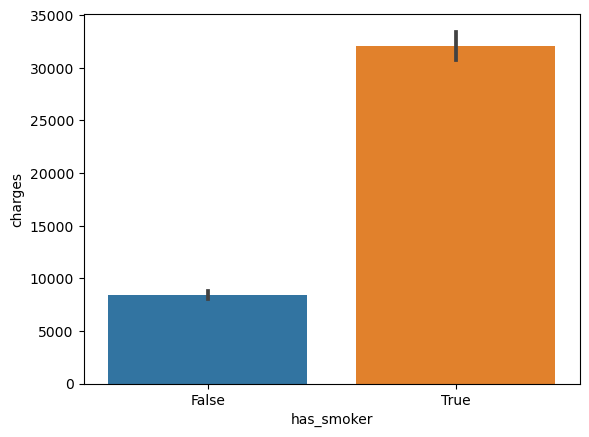

In [12]:
## visualize the group means
sns.barplot(data=plot_df, x='has_smoker',y='charges')

## 3. Testing Assumptions

- No significant outliers
- Normality
- noEqual Variance

### Checking Assumption of No Sig. Outliers

In [13]:
## Saving JUST the numeric col as final group variables
has_no_smoker_group = no_smoker_df['charges']
has_smoker_group = smoker_df['charges']
has_no_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

### Visualize and separate data for hypothesis

In [14]:
## Check smoke group for outliers
has_smoker_outliers = np.abs(stats.zscore(has_smoker_group)) > 3
has_smoker_outliers.sum()

0

In [15]:
## Check no_smoke group for outliers
has_no_smoker_outliers = np.abs(stats.zscore(has_no_smoker_group)) > 3
has_no_smoker_outliers.sum()

24

In [16]:
## remove outliers from female_group
has_no_smoker_group = has_no_smoker_group.loc[~has_no_smoker_outliers]
has_no_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

### Test for Normality

In [17]:
## Check smoke group for normality
result = stats.normaltest(has_smoker_group)
result.pvalue

5.564930630036463e-14

In [18]:
## Check n for smoke group
len(has_smoker_group)

274

In [19]:
## Check no smoke group for normality
result = stats.normaltest(has_no_smoker_group)
result.pvalue

2.6945416315543976e-36

In [20]:
## Check n for no smoke  group
len(has_no_smoker_group)

1040

- We have enough groups that we can safely disregard the assumption of normality.

### Test for Equal Variances

In [21]:
## Use Levene's test for equal variance
result = stats.levene(has_no_smoker_group, has_smoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [22]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption of normality and the assumption of  no equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

## Final Hypothesis Test - Welch's T-Test

In [23]:
result = stats.ttest_ind(has_no_smoker_group, has_smoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)


True

In [24]:
has_no_smoker_group.mean()

7939.8608446721155

In [25]:
has_smoker_group.mean()

32050.23183153284

We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that insurance charges for smokers are different from the insurance charges for non-smokers..

# Q2. Are men more likely to smoke than women?

- Null Hypothesis ($H_0$): The proportion of smokers is the same among men and women.
- Alternative Hypothesis ($H_A$): The proportion of smokers is different between men and women.

## 2. Determine the correct test to perform.
- Type of Data: Categorical (smoker, sex)
- Groups/Samples: Male vs. Female
- Correct Test: Chi-Square Test of Independence (to test the association between two categorical variables)

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [26]:
# Check the column names in your DataFrame

print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'has_smoker'],
      dtype='object')


In [27]:
## check the col that contains the measurement
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [28]:
## check the col that contains info smoke
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [29]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

In [30]:
# Reset the index to access 'sex' and 'smoker' as columns
contingency_table = contingency_table.reset_index()

In [31]:
# Melt the data to create a long-form DataFrame
melted_df = pd.melt(contingency_table, id_vars=['sex'], var_name='smoker', value_name='count')

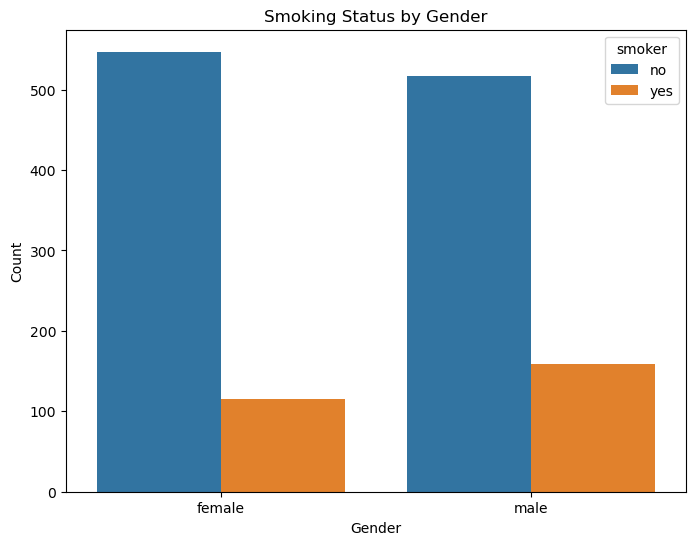

In [32]:
# Bar chart to visualize the proportion of smokers and non-smokers by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='count', hue='smoker', data=melted_df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Smoking Status by Gender')
plt.show()

## 3. Testing Assumptions

- No significant outliers
- Normality
- noEqual Variance

### Checking Assumption of No Sig. Outliers

In [33]:
# Check for unusual or unexpected values in 'sex' and 'smoker' columns
unique_sex_values = df['sex'].unique()
unique_smoker_values = df['smoker'].unique()

print("Unique values in 'sex' column:", unique_sex_values)
print("Unique values in 'smoker' column:", unique_smoker_values)


Unique values in 'sex' column: ['female' 'male']
Unique values in 'smoker' column: ['yes' 'no']


### Visualize and separate data for hypothesis

In [34]:
## Check smoke group for outliers
has_smoker_outliers = np.abs(stats.zscore(has_smoker_group)) > 3
has_smoker_outliers.sum()

0

In [35]:
## Check no_smoke group for outliers
has_no_smoker_outliers = np.abs(stats.zscore(has_no_smoker_group)) > 3
has_no_smoker_outliers.sum()

19

### Test for Normality

In [36]:
## Check smoke group for normality
result = stats.normaltest(has_smoker_group)
result.pvalue

5.564930630036463e-14

In [37]:
## Check n for smoke group
len(has_smoker_group)

274

In [38]:
## Check no smoke group for normality
result = stats.normaltest(has_no_smoker_group)
result.pvalue

2.6945416315543976e-36

In [39]:
## Check n for no smoke  group
len(has_no_smoker_group)

1040

- We have enough groups that we can safely disregard the assumption of normality.

### Test for Equal Variances

In [40]:
# Create a contingency table of gender (sex) and smoking status (smoker)
contingency_table = pd.crosstab(df['sex'], df['smoker'])

In [41]:
# Perform the Chi-Square Test of Independence
chi2, p, _, _ = chi2_contingency(contingency_table)


In [42]:
# Set the significance level (alpha)
alpha = 0.05


In [43]:
# Print the test results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Chi-Square Statistic: 7.39291081459996
p-value: 0.006548143503580696


In [44]:
# Check if the p-value is less than alpha to determine the significance of the relationship
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between gender and smoking status.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between gender and smoking status.")


Reject the null hypothesis: There is a significant relationship between gender and smoking status.


## Final Hypothesis Test - Welch's T-Test

In [45]:
result = stats.ttest_ind(has_no_smoker_group, has_smoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)


True

In [46]:
has_no_smoker_group.mean()

7939.8608446721155

In [47]:
has_smoker_group.mean()

32050.23183153284

We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that The proportion of smokers is different between men and women.

# Q3. Do different regions have different charges, on average?

- Null Hypothesis ($H_0$): The mean insurance charges are equal across all regions.
- Alternative Hypothesis ($H_A$): The mean insurance charges are not equal across all regions.

## 2. Determine the correct test to perform.
- Type of Data: Numerical (charges)
- Groups/Samples: Regions (multiple groups)
- Correct Test: Analysis of Variance (ANOVA) or Kruskal-Wallis Test (for comparing means across multiple groups)

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [48]:
# Check the column names in your DataFrame

print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'has_smoker'],
      dtype='object')


In [49]:
## check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [50]:
## check the col that contains info smoke
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

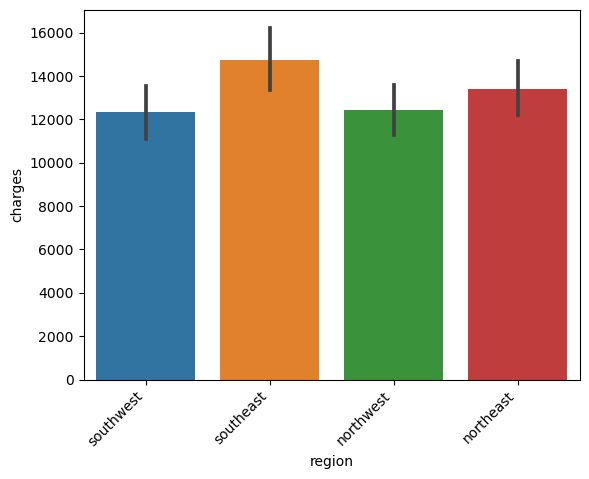

In [51]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [52]:
needed_cols = ['region','charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [53]:
## Create a dictionary with each group as region and chargeas values
groups ={}

for sector in df['region'].unique():
    temp = df.loc[df['region']== sector, 'charges']
    groups[sector] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [54]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [55]:
## Loop through groups dict
for sector, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[sector] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


### Test for Normality

In [56]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


- We failed the assumption of normality, but our groups are large enough that we can safely disregard/ignore the assumption of normality.

### Test for Equal Variances

In [57]:
## DEMO: using the * operator to unpack lists
a_list = ['a','b','c']
b_list = [1,2,3]

new_list =[*a_list, *b_list]
new_list

['a', 'b', 'c', 1, 2, 3]

In [58]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [59]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We wanted to run an ANOVA test but will need to use a Kurskal-Wallis test instead.

## Final Hypothesis Test

In [60]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Testing Converting our Dictionary to a DataFrame

In [61]:
## slice a test sector
temp = groups['southwest']
temp

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 317, dtype: float64

In [62]:
## test making a datafrae from the test sector and filling in the sector name
pd.DataFrame({'charges':temp, 'region':'southwest'})

,charges,region
0,16884.92400,southwest
12,1826.84300,southwest
15,1837.23700,southwest
18,10602.38500,southwest
19,36837.46700,southwest
...,...,...
1316,1731.67700,southwest
1329,10325.20600,southwest
1331,10795.93733,southwest
1332,11411.68500,southwest


#### Preparing the new dataframe for Tukey's test in a looop

In [63]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'charges':temp, 'region':sector})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,charges,region
0,16884.92400,southwest
12,1826.84300,southwest
15,1837.23700,southwest
18,10602.38500,southwest
19,36837.46700,southwest
...,...,...
1321,28101.33305,northeast
1325,13143.33665,northeast
1326,7050.02130,northeast
1328,22395.74424,northeast


In [64]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['charges']
labels = tukeys_data['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-1340.917,0.4263,-3611.7411,929.9072,False
northeast,southeast,1529.834,0.2794,-670.6825,3730.3505,False
northeast,southwest,-1511.915,0.3181,-3784.5349,760.705,False
northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
northwest,southwest,-170.998,0.9974,-2447.1716,2105.1756,False
southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


In [65]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1340.9170,0.4263,-3611.7411,929.9072,False
1,northeast,southeast,1529.8340,0.2794,-670.6825,3730.3505,False
2,northeast,southwest,-1511.9150,0.3181,-3784.5349,760.7050,False
3,northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
4,northwest,southwest,-170.9980,0.9974,-2447.1716,2105.1756,False
5,southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


In [66]:
pd.set_option('display.max_rows',120)
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1340.9170,0.4263,-3611.7411,929.9072,False
1,northeast,southeast,1529.8340,0.2794,-670.6825,3730.3505,False
2,northeast,southwest,-1511.9150,0.3181,-3784.5349,760.7050,False
3,northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
4,northwest,southwest,-170.9980,0.9974,-2447.1716,2105.1756,False
5,southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


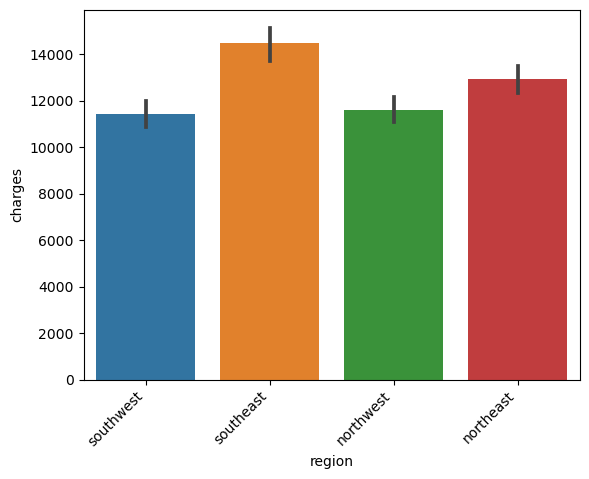

In [67]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='region', y='charges', errorbar=('ci', 68))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [68]:
## Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1340.917,0.4263,-3611.7411,929.9072,False
1,northeast,southeast,1529.834,0.2794,-670.6825,3730.3505,False
2,northeast,southwest,-1511.915,0.3181,-3784.5349,760.7050,False
4,northwest,southwest,-170.998,0.9974,-2447.1716,2105.1756,False


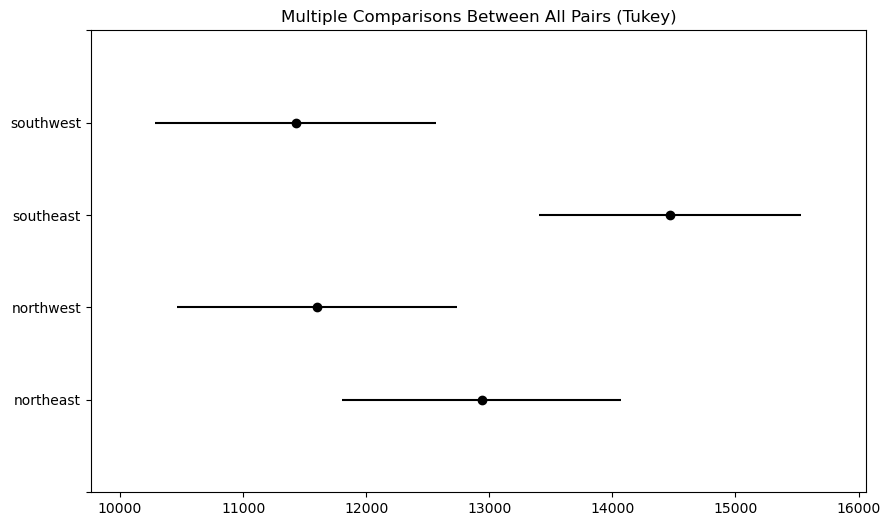

In [69]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

- As we can see, there are MANY region that are different from each other. Some highlights include that southeast and northeast have the highest average charges and southwest has the lowest.